In [73]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from KMeansImp import *
import matplotlib.pyplot as plt

In [74]:
testData_images = pd.read_csv("1668784614_268637_test-data-images.txt", delim_whitespace=True, header=None)
#print(testData_images)
testData_images = testData_images.to_numpy()
print(len(testData_images))
testData_images = np.asarray([testData_images[i][0].split(',') for i in range(len(testData_images))])
print(testData_images.shape)

10740
(10740, 784)


In [75]:
#normalizing
transformer = Normalizer().fit(testData_images)
testData_images= transformer.transform(testData_images)
#print(testData_images)

C:\Users\kumar\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
C:\Users\kumar\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [76]:
# #reducing the dimensions for the data using PCA
# pca = PCA(n_components = 80)
# testData_images_dimRed = pca.fit_transform(testData_images/255)
# #print(testData_images_dimRed[0:5][0:5])
# #check shape
# print(testData_images_dimRed.shape)
#reducing dimensions for the data using TSNE
from sklearn.manifold import TSNE
tsne = TSNE()
testData_images_dimRed2 = tsne.fit_transform(testData_images)
print(testData_images_dimRed2.shape)

C:\Users\kumar\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\kumar\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(10740, 2)


In [81]:
# now trying to fit kmeans model into the dataset
errs = np.zeros((100, 10))
centrs = np.zeros((100, 10, 2))
labels = np.zeros((100, 10740))
for i in range(100):
    KMeanCalculation_Digit = KMeansImp(X_Data= testData_images_dimRed2, K_Clusters= 10, F_random = 2)
    KMeanCalculation_Digit.randomCentroid()
    centrs[i], errs[i], labels[i] = KMeanCalculation_Digit.Main(itr = 40)

In [82]:
#calculating the total error
totErr = errs.sum(axis = 1)
optKMean2 = np.argmin(totErr)
print("Error: ", errs)
print("Total Error: ", totErr)
print("Optimal Error: ", totErr[optKMean2])

Error:  [[23656.29815851 23771.07012793 11371.37798576  5913.33184713
  13217.01006846 15390.6274675  28416.74662965 14166.5788001
  18070.75171224  4673.48177153]
 [17182.62775443  6157.27878588 14152.39054645 22558.41172865
   9900.57428397 13226.07701987  8070.60010609 28066.66067396
  17176.64051859 15937.33979338]
 [14017.04319052 17260.84706785 16314.06184154 21714.42869833
   9776.20139457 14570.6078745  13286.28391732 11719.55841217
  18657.15870223 13174.67701753]
 [17182.62775443  6157.27878588 14152.39054645 22558.41172865
   9900.57428397 13226.07701987  8070.60010609 28066.66067396
  17176.64051859 15937.33979338]
 [13226.07701987  6157.27878588 22948.98905164 14152.39054645
   9865.87957238 17159.03940652 27916.29585729  8070.60010609
  15822.94882558 17079.60470579]
 [15308.10036861 13286.28391732 13968.11839875 15709.6791224
  11282.15130531 19956.90983099 16314.06184154 12356.44674602
  14569.21991283 18135.83894179]
 [14152.39054645 22558.41172865  6318.69705091 17182

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

<Figure size 432x288 with 0 Axes>

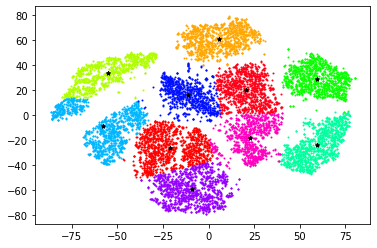

In [83]:
# now we calculate the preds
preds = labels[optKMean2].astype(int)

# now we visualize our predictions in the form of graphical clustering
plot = plt.figure()
colorPlot = plt.cm.get_cmap('hsv', 10)
fig, axis = plt.subplots()

for i in range(10):
    axis.scatter(testData_images_dimRed2[labels[optKMean2] == i][:,0],testData_images_dimRed2[labels[optKMean2] == i][:, 1], s = 1, c = colorPlot(i))
    axis.scatter(centrs[optKMean2][i, 0], centrs[optKMean2][i, 1], marker = '*', s = 16, c = 'black')


In [84]:
#Validating our finding using evaluation metric for a good clustering
#Using silhouette coeff for the same
from sklearn.metrics import silhouette_score
scr = silhouette_score(testData_images_dimRed2,preds)
print(f'Score:{scr}')

Score:0.45481640100479126


In [85]:
#writing predictions to a file
np.savetxt("new_last_digit_pred07.txt", preds, fmt = '%s')